# Python lists and arrays vs. NumPy arrays

In [1]:
import numpy as np
import array
from math import sin
import pandas as pd
import matplotlib.pyplot as plt

# Python %timeit
#### %%timeit command is used to get the time execution for the following Python code blocks
%%timeit is executed with following options.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;-n: Execute the given statement n times in a loop.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;-r: repeat the loop iteration times.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;-q: Quiet, do not print result.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;-o: return a TimeitResult that can be stored in a variable to inspect.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;-p: use a precision of digits to display the timing result. Default: 3<br/>

# 1a) Vector Addition
## Using Python Lists

In [2]:
N = 10000000
v = range(N) #creates a Python list [0 1 2 ---- N-1]
list_add_tr = []     # Store timing results in this list

### &ensp;&ensp;&ensp;&ensp;&ensp;  i) Loop without pre-allocating result memory

In [3]:
%%timeit -n 3 -r 3 -o -p 3
w = [] #creating an empty list 
#Adding two numbers using loop with list
for i in range(len(v)):
    w.append(v[i] + v[i])

3.43 s ± 9.65 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 3.43 s ± 9.65 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [4]:
list_add_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp; ii) Loop with pre-allocating result memory

In [5]:
%%timeit -n 3 -r 3 -o -p 3
#Adding two number by pre-allocating the memory with list
w = len(v)*[0] 

for i in range(len(v)):
    w[i] = v[i] + v[i]

3.03 s ± 64.4 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 3.03 s ± 64.4 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [6]:
list_add_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp;iii) Map Function

In [7]:
%%timeit -n 3 -r 3 -o -p 3
#Adding two numbers using map function with list
def add_list(x,y):
    return x+y

w = list(map(add_list, v,v))

1.44 s ± 5.18 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 1.44 s ± 5.18 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [8]:
list_add_tr.append(_.best)

## Using Python Arrays

In [9]:
v = array.array('d',range(N)) #creates a Python array [0 1 2 ---- N-1]
arr_add_tr = []

### &ensp;&ensp;&ensp;&ensp;&ensp;  i) Loop without pre-allocating result memory

In [10]:
%%timeit -n 3 -r 3 -o -p 3
w = array.array('d',[]) #creating an empty array
#Adding two numbers using loop with array
for i in range(len(v)):
    w.append(v[i] + v[i])

2.5 s ± 50.6 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.5 s ± 50.6 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [11]:
arr_add_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp; ii) Loop with pre-allocating result memory

In [12]:
%%timeit -n 3 -r 3 -o -p 3
#Adding two number by pre-allocating the memory with array
w = array.array('d',[0]*len(v)) 

for i in range(len(v)):
    w[i] = v[i] + v[i]

2.2 s ± 29.2 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.2 s ± 29.2 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [13]:
arr_add_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp;iii) Map Function

In [14]:
%%timeit -n 3 -r 3 -o -p 3
#Adding two numbers using map function with array
def add_array(x,y):
    return x+y

w = array.array('d',(map(add_array,v,v)))

1.76 s ± 4.38 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 1.76 s ± 4.38 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [15]:
arr_add_tr.append(_.best)

## Using Numpy Arrays

In [16]:
v = np.arange(N) #creates a numpy array
npArr_add_tr = []

### &ensp;&ensp;&ensp;&ensp;&ensp;  i) Loop without pre-allocating result memory

In [17]:
%%timeit -n 3 -r 3 -o -p 3
#Adding two numbers using loop with numpy array
w = np.array([])  # Creating an empty NumPy array
for i in range(len(v)):
    w.resize(i+1)
    w[i] = v[i] + v[i]    

15.9 s ± 143 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 15.9 s ± 143 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [18]:
npArr_add_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp; ii) Loop with pre-allocating result memory

In [19]:
%%timeit -n 3 -r 3 -o -p 3
#Adding two numbers by pre-allocating the memory with numpy array
w = np.zeros(len(v))  # Creating an empty NumPy array
for i in range(len(v)):
    w[i] = v[i] + v[i]

3.49 s ± 69.4 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 3.49 s ± 69.4 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [20]:
npArr_add_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp;iii) Numpy Vectorized Operation

In [21]:
%%timeit -n 3 -r 3 -o -p 3
#Adding two numbers by vectorized method (similar to Matlab) with numpy array
w = v + v

28.7 ms ± 512 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 28.7 ms ± 512 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [22]:
npArr_add_tr.append(_.best)

# 1b) Vector Multiplitcation
## Using Python Lists

In [23]:
v = range(N) #creates a Python list [0 1 2 ---- N-1]
list_mult_tr = []     # Store timing results in this list

### &ensp;&ensp;&ensp;&ensp;&ensp;  i) Loop without pre-allocating result memory

In [24]:
%%timeit -n 3 -r 3 -o -p 3
w = [] #creating an empty list 
#Multiplying two numbers using loop with list
for i in range(len(v)):
    w.append(v[i] * v[i])

3.37 s ± 13.6 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 3.37 s ± 13.6 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [25]:
list_mult_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp; ii) Loop with pre-allocating result memory

In [26]:
%%timeit -n 3 -r 3 -o -p 3
#Multiplying two number by pre-allocating the memory with list
w = len(v)*[0] 

for i in range(len(v)):
    w[i] = v[i] * v[i]

2.95 s ± 5.65 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.95 s ± 5.65 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [27]:
list_mult_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp;iii) Map Function

In [28]:
%%timeit -n 3 -r 3 -o -p 3
#Mutliplying two numbers using map function with list
def mult_list(x,y):
    return x*y

w = list(map(mult_list, v,v))

1.47 s ± 11.1 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 1.47 s ± 11.1 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [29]:
list_mult_tr.append(_.best)

## Using Python Arrays

In [30]:
v = array.array('d',range(N)) #creates a Python array [0 1 2 ---- N-1]
arr_mult_tr = []     # Store timing results in this list

### &ensp;&ensp;&ensp;&ensp;&ensp;  i) Loop without pre-allocating result memory

In [31]:
%%timeit -n 3 -r 3 -o -p 3
w = array.array('d',[]) #creating an empty array
#Multiplying two numbers using loop with array
for i in range(len(v)):
    w.append(v[i] * v[i])

2.46 s ± 32.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.46 s ± 32.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [32]:
arr_mult_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp; ii) Loop with pre-allocating result memory

In [33]:
%%timeit -n 3 -r 3 -o -p 3
#Multiplying two number by pre-allocating the memory with array
w = array.array('d',[0]*len(v)) 

for i in range(len(v)):
    w[i] = v[i] * v[i]

2.12 s ± 7.46 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.12 s ± 7.46 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [34]:
arr_mult_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp;iii) Map Function

In [35]:
%%timeit -n 3 -r 3 -o -p 3
#Multiplying two numbers using map function with array
def mult_array(x,y):
    return x*y

w = array.array('d',(map(mult_array,v,v)))

1.76 s ± 15.2 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 1.76 s ± 15.2 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [36]:
arr_mult_tr.append(_.best)

## Using Numpy Arrays

In [37]:
v = np.arange(N) #creates a numpy array
npArr_mult_tr = []     # Store timing results in this list

### &ensp;&ensp;&ensp;&ensp;&ensp;  i) Loop without pre-allocating result memory

In [38]:
%%timeit -n 3 -r 3 -o -p 3
#Multiplying two numbers using loop with numpy array
w = np.array([])  # Creating an empty NumPy array
for i in range(len(v)):
    w.resize(i+1)
    w[i] = v[i] * v[i]    

15.6 s ± 88.8 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 15.6 s ± 88.8 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [39]:
npArr_mult_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp; ii) Loop with pre-allocating result memory

In [40]:
%%timeit -n 3 -r 3 -o -p 3
#Multiplying two numbers by pre-allocating the memory with numpy array
w = np.zeros(len(v))  # Creating an empty NumPy array
for i in range(len(v)):
    w[i] = v[i] * v[i]

3.27 s ± 18.3 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 3.27 s ± 18.3 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [41]:
npArr_mult_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp;iii) Numpy Vectorized Operation

In [42]:
%%timeit -n 3 -r 3 -o -p 3
#Multiplying two numbers by vectorized method (similar to Matlab) with numpy array
w = v * v

32.4 ms ± 788 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 32.4 ms ± 788 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [43]:
npArr_mult_tr.append(_.best)

# 1c) Elementary Function (Sine Function)
## Using Python Lists

In [44]:
v = range(N) #creates a Python list [0 1 2 ---- N-1]
list_sine_tr = []  # Store timing results in this list

### &ensp;&ensp;&ensp;&ensp;&ensp;  i) Loop without pre-allocating result memory

In [45]:
%%timeit -n 3 -r 3 -o -p 3
w = [] #creating an empty list 
#Calculating sine for each element using loop with list
for i in range(len(v)):
    w.append(sin(v[i]))

3.37 s ± 13.9 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 3.37 s ± 13.9 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [46]:
list_sine_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp; ii) Loop with pre-allocating result memory

In [47]:
%%timeit -n 3 -r 3 -o -p 3
#Calculating sine for each element by pre-allocating the memory with list
w = len(v)*[0] 

for i in range(len(v)):
    w[i] = sin(v[i])

2.98 s ± 11.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.98 s ± 11.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [48]:
list_sine_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp;iii) Map Function

In [49]:
%%timeit -n 3 -r 3 -o -p 3
#Calculating sine for each element using map function with list
def sine_list(x):
    return sin(x)

w = list(map(sine_list, v))

2.09 s ± 28.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.09 s ± 28.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [50]:
list_sine_tr.append(_.best)

## Using Python Arrays

In [51]:
v = array.array('d',range(N)) #creates a Python array [0 1 2 ---- N-1]
arr_sine_tr = []

### &ensp;&ensp;&ensp;&ensp;&ensp;  i) Loop without pre-allocating result memory

In [52]:
%%timeit -n 3 -r 3 -o -p 3
w = array.array('d',[]) #creating an empty array
#Calculating sine for each element using loop with array
for i in range(len(v)):
    w.append(sin(v[i]))

2.99 s ± 22.8 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.99 s ± 22.8 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [53]:
arr_sine_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp; ii) Loop with pre-allocating result memory

In [54]:
%%timeit -n 3 -r 3 -o -p 3
#Calculating sine for each element by pre-allocating the memory with array
w = array.array('d',[0]*len(v)) 

for i in range(len(v)):
    w[i] = sin(v[i])

2.52 s ± 33.8 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.52 s ± 33.8 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [55]:
arr_sine_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp;iii) Map Function

In [56]:
%%timeit -n 3 -r 3 -o -p 3
#Calculating sine for each element using map function with array
def sine_array(x):
    return sin(x)

w = array.array('d',(map(sine_array,v)))

2.36 s ± 12.7 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.36 s ± 12.7 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [57]:
arr_sine_tr.append(_.best)

## Using Numpy Arrays

In [58]:
v = np.arange(N) #creates a numpy array
npArr_sine_tr = []

### &ensp;&ensp;&ensp;&ensp;&ensp;  i) Loop without pre-allocating result memory

In [59]:
%%timeit -n 3 -r 3 -o -p 3
#Calculating sine for each element using loop with numpy array
w = np.array([])  # Creating an empty NumPy array
for i in range(len(v)):
    w.resize(i+1)
    w[i] = sin(v[i])    

16 s ± 148 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 16 s ± 148 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [60]:
npArr_sine_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp; ii) Loop with pre-allocating result memory

In [61]:
%%timeit -n 3 -r 3 -o -p 3
#Calculating sine for each element by pre-allocating the memory with numpy array
w = np.zeros(len(v))  # Creating an empty NumPy array
for i in range(len(v)):
    w[i] = sin(v[i])

2.88 s ± 35 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 2.88 s ± 35 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [62]:
npArr_sine_tr.append(_.best)

### &ensp;&ensp;&ensp;&ensp;&ensp;iii) Numpy Vectorized Operation

In [63]:
%%timeit -n 3 -r 3 -o -p 3
#Calculating sine for each element by vectorized method (similar to Matlab) with numpy array
w = np.sin(v)

262 ms ± 4.86 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<TimeitResult : 262 ms ± 4.86 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

In [64]:
npArr_sine_tr.append(_.best)

# Using Pandas
#### Results are displayed by formatting Pandas tables and rendering them for display.
pandas.Dataframe() is used with following options.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;   data: lists of timing data.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;  index: row labels .<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;columns: columns labels.<br/>
<br/>
Styler.highlight_max() and Styler.highlight_min are used with following options.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;   axis: None (for tablewise).<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;  color: red(max) and green(min) .<br/>

In [65]:
matlab_add_tr = [0.901, 0.108, 0.022] #Matlab Script with timing results 
                                      #is attached in the cell below
df_addition = pd.DataFrame(
    data    = [list_add_tr, arr_add_tr, npArr_add_tr,matlab_add_tr],
    index   = ['list','array','numpy','Matlab Array'],
    columns = ['loop', 'pre-loop', 'map/vectorize']
    )
df_addition.style
new_df_add = pd.io.formats.style.Styler(
    data      = df_addition,
    precision = 3, 
    caption   = 'Problem 1 : Timing results for vector addition (seconds)',
    )

new_df_add.highlight_max(
    axis = None,
    color = "red"
    )

new_df_add.highlight_min(
    axis = None,
    color = "green"
    )

,loop,pre-loop,map/vectorize
list,3.41,2.99,1.43
array,2.43,2.17,1.76
numpy,15.8,3.44,0.0283
Matlab Array,0.901,0.108,0.022


In [66]:
matlab_mult_tr = [0.932, 0.113, 0.023] #Matlab Script with timing results 
                                      #is attached in the cell below
df_mult = pd.DataFrame(
    data    = [list_mult_tr, arr_mult_tr, npArr_mult_tr,matlab_mult_tr],
    index   = ['list','array','numpy','Matlab Array'],
    columns = ['loop', 'pre-loop', 'map/vectorize']
    )
df_mult.style
new_df_mult = pd.io.formats.style.Styler(
    data      = df_mult,
    precision = 3, 
    caption   = 'Problem 1 : Timing results for vector multiplication (seconds)',
    )

new_df_mult.highlight_max(
    axis = None,
    color = "red"
    )

new_df_mult.highlight_min(
    axis = None,
    color = "green"
    )

,loop,pre-loop,map/vectorize
list,3.36,2.95,1.46
array,2.43,2.11,1.74
numpy,15.5,3.25,0.0316
Matlab Array,0.932,0.113,0.023


In [67]:
matlab_sine_tr = [1.270, 0.250, 0.129] #Matlab Script with timing results 
                                      #is attached in the cell below
df_sine = pd.DataFrame(
    data    = [list_sine_tr, arr_sine_tr, npArr_sine_tr, matlab_sine_tr],
    index   = ['list','array','numpy','Matlab Array'],
    columns = ['loop', 'pre-loop', 'map/vectorize']
    )
df_sine.style
new_df_sine = pd.io.formats.style.Styler(
    data      = df_sine,
    precision = 3, 
    caption   = 'Problem 1 : Timing results for sin function (seconds)',
    )

new_df_sine.highlight_max(
    axis = None,
    color = "red"
    )

new_df_sine.highlight_min(
    axis = None,
    color = "green"
    )

,loop,pre-loop,map/vectorize
list,3.35,2.96,2.06
array,2.96,2.49,2.34
numpy,15.8,2.84,0.258
Matlab Array,1.27,0.25,0.129


# Using Pandas
#### Results are displayed by bar charts using Matplotlib.

<IPython.core.display.Javascript object>


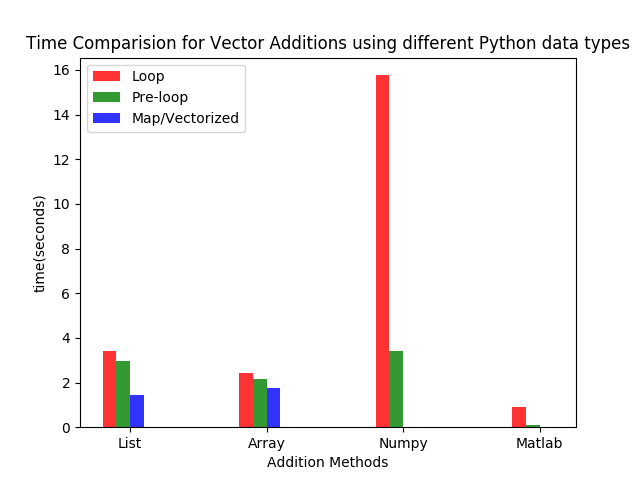

In [69]:
%matplotlib notebook
# data to plot
n_groups = 4
add_loop       = [list_add_tr[0], arr_add_tr[0], npArr_add_tr[0], matlab_add_tr[0]]
add_ploop      = [list_add_tr[1], arr_add_tr[1], npArr_add_tr[1], matlab_add_tr[1]]
add_map_vectz  = [list_add_tr[2], arr_add_tr[2], npArr_add_tr[2], matlab_add_tr[2]]

# create plot
f, ax = plt.subplots(nrows = 1,
                    ncols = 1
                    )

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8
 
rects1 = plt.bar(index, add_loop, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Loop')
 
rects2 = plt.bar(index + bar_width, add_ploop, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Pre-loop')

rects3 = plt.bar(index + (2*bar_width), add_map_vectz, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Map/Vectorized')

# rects4 = plt.bar(index + (3*bar_width), add_matlab_add, bar_width,
#                  alpha=opacity,
#                  color='y',
#                  label='Matlab')

plt.xlabel('Addition Methods')
plt.ylabel('time(seconds)')
plt.title('Time Comparision for Vector Additions using different Python data types')
plt.xticks(index + ((1.5)*bar_width), ('List', 'Array', 'Numpy', 'Matlab'))
plt.legend(loc = 2)
plt.show()

<IPython.core.display.Javascript object>


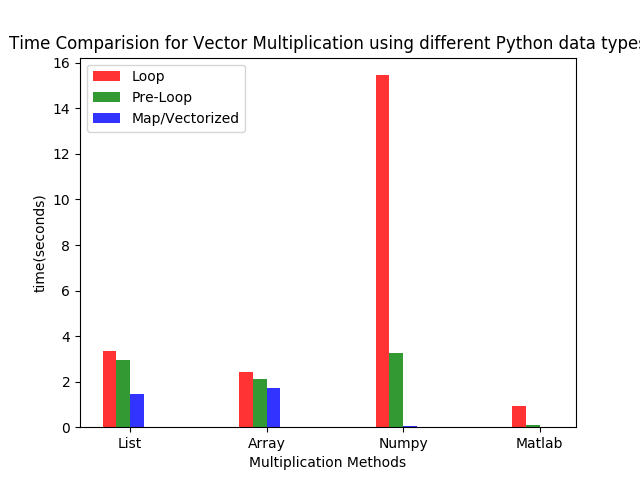

In [70]:
%matplotlib notebook
# data to plot
n_groups = 4
mult_loop       = (list_mult_tr[0], arr_mult_tr[0], npArr_mult_tr[0], matlab_mult_tr[0])
mult_ploop      = (list_mult_tr[1], arr_mult_tr[1], npArr_mult_tr[1], matlab_mult_tr[1])
mult_map_vectz  = (list_mult_tr[2], arr_mult_tr[2], npArr_mult_tr[2], matlab_mult_tr[2])


# create plot
f, ax = plt.subplots(nrows = 1,
                    ncols = 1
                    )

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8
 
rects1 = plt.bar(index, mult_loop, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Loop')
 
rects2 = plt.bar(index + bar_width, mult_ploop, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Pre-Loop')

rects2 = plt.bar(index + (2*bar_width), mult_map_vectz, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Map/Vectorized')
 
plt.xlabel('Multiplication Methods')
plt.ylabel('time(seconds)')
plt.title('Time Comparision for Vector Multiplication using different Python data types')
plt.xticks(index + ((1.5)*bar_width), ('List', 'Array', 'Numpy', 'Matlab'))
plt.legend(loc = 2)
plt.show()


<IPython.core.display.Javascript object>


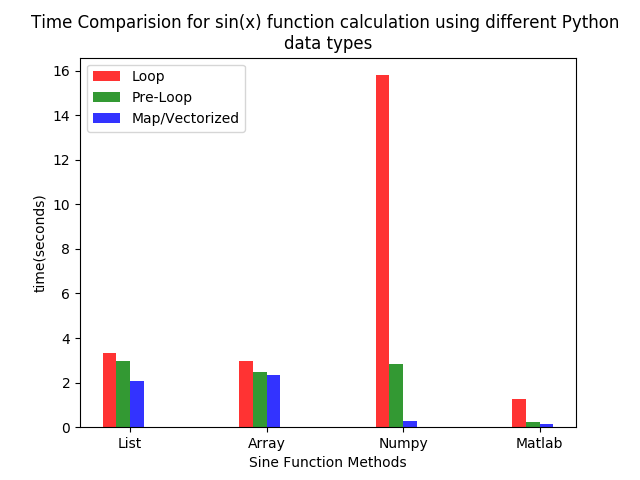

In [71]:
%matplotlib notebook
# data to plot
n_groups = 4
sin_loop       = (list_sine_tr[0], arr_sine_tr[0], npArr_sine_tr[0], matlab_sine_tr[0])
sin_ploop      = (list_sine_tr[1], arr_sine_tr[1], npArr_sine_tr[1], matlab_sine_tr[1])
sin_map_vectz  = (list_sine_tr[2], arr_sine_tr[2], npArr_sine_tr[2], matlab_sine_tr[2])

# create plot
f, ax = plt.subplots(nrows = 1,
                    ncols = 1
                    )

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8
 
rects1 = plt.bar(index, sin_loop, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Loop')
 
rects2 = plt.bar(index + bar_width, sin_ploop, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Pre-Loop')

rects2 = plt.bar(index + (2*bar_width), sin_map_vectz, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Map/Vectorized')
 
plt.xlabel('Sine Function Methods')
plt.ylabel('time(seconds)')
plt.title('Time Comparision for sin(x) function calculation using different Python \ndata types')
plt.xticks(index + ((1.5)*bar_width), ('List', 'Array', 'Numpy', 'Matlab'))
plt.legend(loc = 2)
plt.show()

# Matlab Timing Results

<img src="ME571_HW1_1.png">

#### Observations

1) With all data types(arrays, list, numpy and Matlab), using pre-allocation of memory gave better performance compared to appending data at run-time. <br\>
2) The performance of vectorized operation is best, given a certain data type.<br\>
3) Among all of the Python data types, numpy arrays took least amount of time for vectorized operations.<br\>
4) Matlab arrays were comparable to Python numpy arrays. (Note that: Performance of Matlab was evaluated at different system)